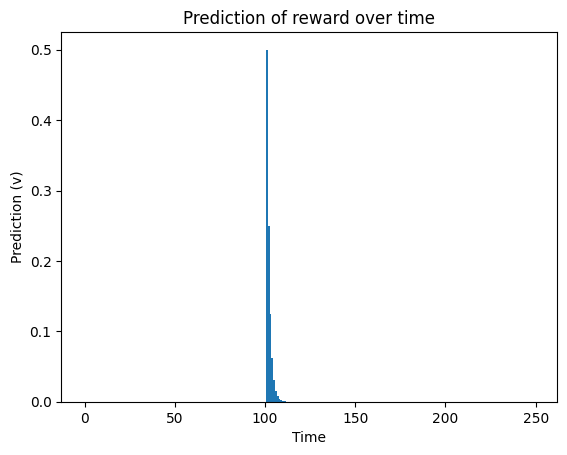

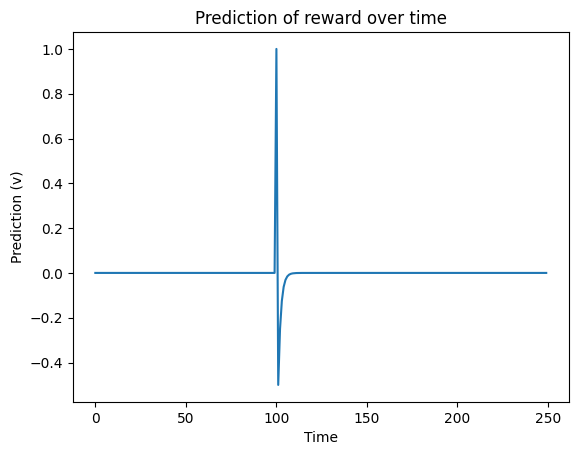

In [2]:
from matplotlib import pyplot as plt
import numpy as np

v = 0  #  Prediction
w = 0  #  Weight parameter
epsi = 0.5  #  Learning rate
delta = 0  #  Prediction error
D = []
U = []

time = np.arange(0, 250, 1)  #  Time axis
yv = []  #  List of predictions

for i in range(250):
    if i == 100:
        u = 1  #  Stimulus
        r = 1  #  Reward
    else:
        u = 1  #  Stimulus
        r = 0  #  No reward
    v = w*u  #  Compute the prediction
    delta = r-v  #  Compute the prediction error
    w = w+epsi*delta*u  #  Compute the weight using rescorla-wagner rule
    yv.append(v)
    U.append(u)
    D.append(delta)

#  Plot
plt.bar(time, yv, width=1)
plt.title('Prediction of reward over time')
plt.xlabel('Time')
plt.ylabel('Prediction (v)')
plt.show()

plt.plot(time, D)
plt.title('Prediction of reward over time')
plt.xlabel('Time')
plt.ylabel('Prediction (v)')
plt.show()

(300,)
(300,)


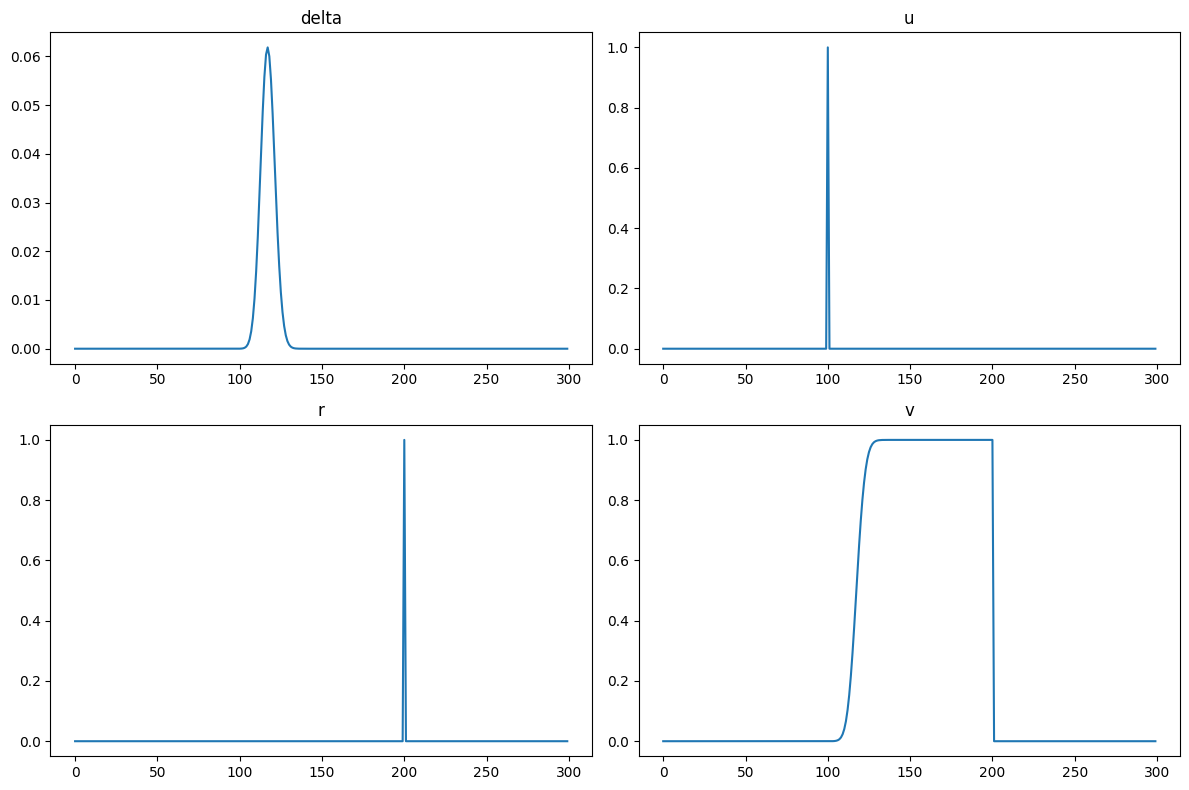

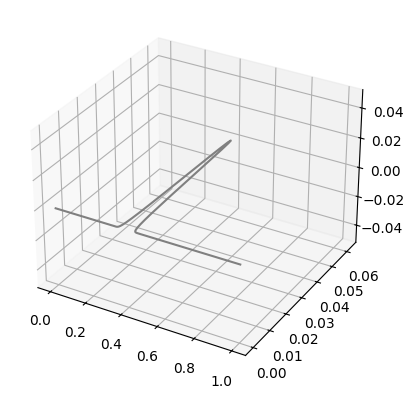

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# Parameters
epsilon = 0.5  # learning rate
T = 300
trials = 250

# Initialize variables
w = np.zeros((T,))
v = np.zeros((T,))
delta = np.zeros((T))
reward = np.zeros((T,))
stimulus = np.zeros((T,))
b = np.linspace(0,1,T)

print(delta.shape)
print(b.shape)

# Training loop
for trial in range(trials):
    for t in range(1, T):
        # Simulate stimulus presentation and reward
        if t == 100:
            stimulus[t] = 1
        if t == 200:
            reward[t] = 1

        # Update v(t) using the formula
        v[t] = np.sum(w[:min(t+1, T)] * stimulus[max(0, t-T+1):t+1][::-1])

        # Calculate temporal difference error
        if t < T - 1:
            delta[t] = reward[t] + v[t+1] - v[t]
        else:
            delta[t] = reward[t] - v[t]

        # Update weights using the modified delta rule
        for tau in range(T):
            if t - tau >= 0:
                w[tau] += epsilon * delta[t] * stimulus[t - tau]

# Plot results
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(delta)
plt.title('delta')

plt.subplot(2, 2, 2)
plt.plot(stimulus)
plt.title('u')

plt.subplot(2, 2, 3)
plt.plot(reward)
plt.title('r')

plt.subplot(2, 2, 4)
plt.plot(v)
plt.title('v')

plt.tight_layout()
plt.show()

ax = plt.axes(projection='3d')
ax.plot3D(np.linspace(0,1,T), delta, np.linspace(0,trials,1), 'gray')


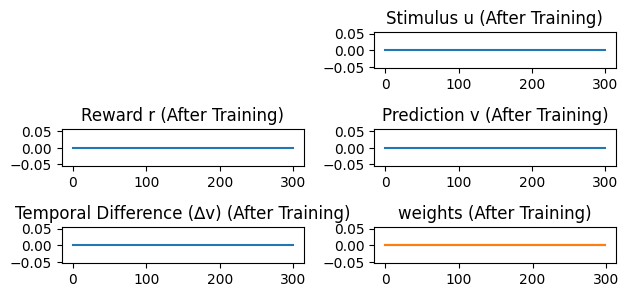

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
epsilon = 0.1  # learning rate
T = 300
trials = 250

# Initialize variables
w = np.zeros((T,))
v = np.zeros((T,))
delta = np.zeros((T,))
reward = np.zeros((T,))
stimulus = np.zeros((T,))
delta_v = np.zeros((T,))



for trial in range(trials):
    for t in range(1, T):
        # Calculate temporal difference error
        if t < T - 1:
            delta_v[t] = v[t] - v[t-1]
            delta[t-1] = reward[t-1] + delta_v[t-1]
    for t in range(1, T):
        # Update v(t) using the formula
        v[t] = np.sum(w[:min(t+1, T)] * stimulus[t-max(0, t-T+1):t+1])
    for t in range(1, T):
        # Update weights using the modified delta rule
        for tau in range(T):
            if t - tau >= 0:
                w[tau] = w[t - tau] + epsilon * delta[t-1] * stimulus[t - tau]

# Plot after training
plt.subplot(5, 2, 6)
plt.plot(stimulus)
plt.title('Stimulus u (After Training)')

plt.subplot(5, 2, 7)
plt.plot(reward)
plt.title('Reward r (After Training)')

plt.subplot(5, 2, 8)
plt.plot(v)
plt.title('Prediction v (After Training)')

plt.subplot(5, 2, 9)
plt.plot(delta_v)
plt.title('Temporal Difference (∆v) (After Training)')

plt.subplot(5, 2, 10)
plt.plot(delta[:-1])
plt.title('Temporal Difference (δ) (After Training)')

plt.subplot(5, 2, 10)
plt.plot(w[:-1])
plt.title('weights (After Training)')

plt.tight_layout()
plt.show()


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
epsilon = 0.5  # learning rate
T = 300
trials = 1
t = 0

# Initialize variables
w = np.zeros((T,))
v = np.zeros((T,))
delta = np.zeros((T,))
reward = np.zeros((T,))
stimulus = np.zeros((T,))
delta_v = np.zeros((T,))

# Training loop

for tau in range(t, T):
    # Simulate stimulus presentation and reward
    if tau == 100:
        stimulus[tau] = 1
    if tau == 200:
        reward[tau] = 1

    # Update v(t) using the formula
    v[tau] = np.sum(reward[tau] * stimulus[T-tau])

    # Calculate temporal difference error
    
    delta_v[t] = v[t] - v[t-1]
    delta[tau] = reward[tau] + v[t+1] -v[tau]

    # Update weights using the modified delta rule
    
    w[tau] += epsilon * delta[tau] * stimulus[T - tau]

# Plot results
plt.figure(figsize=(12, 8))

# Plot before training
plt.subplot(5, 2, 1)
plt.plot(stimulus)
plt.title('Stimulus u (Before Training)')

plt.subplot(5, 2, 2)
plt.plot(reward)
plt.title('Reward r (Before Training)')

plt.subplot(5, 2, 3)
plt.plot(v)
plt.title('Prediction v (Before Training)')

plt.subplot(5, 2, 4)
plt.plot(delta_v)
plt.title('Temporal Difference (∆v) (Before Training)')

plt.subplot(5, 2, 5)
plt.plot(delta[:-1])
plt.title('Temporal Difference (δ) (Before Training)')


IndexError: index 300 is out of bounds for axis 0 with size 300

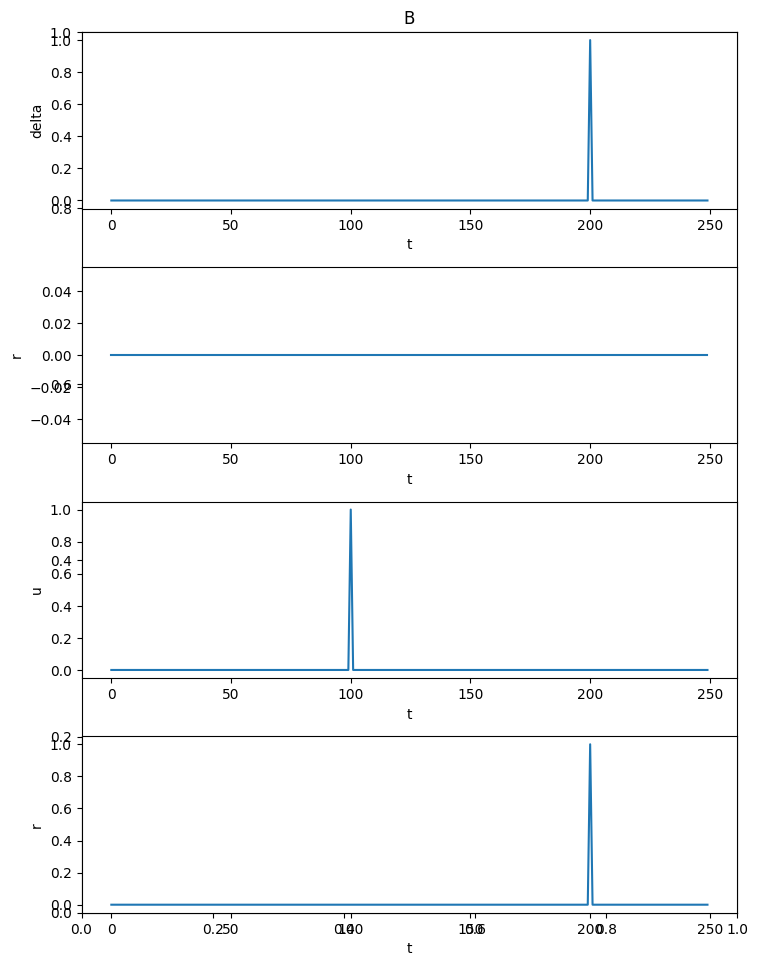

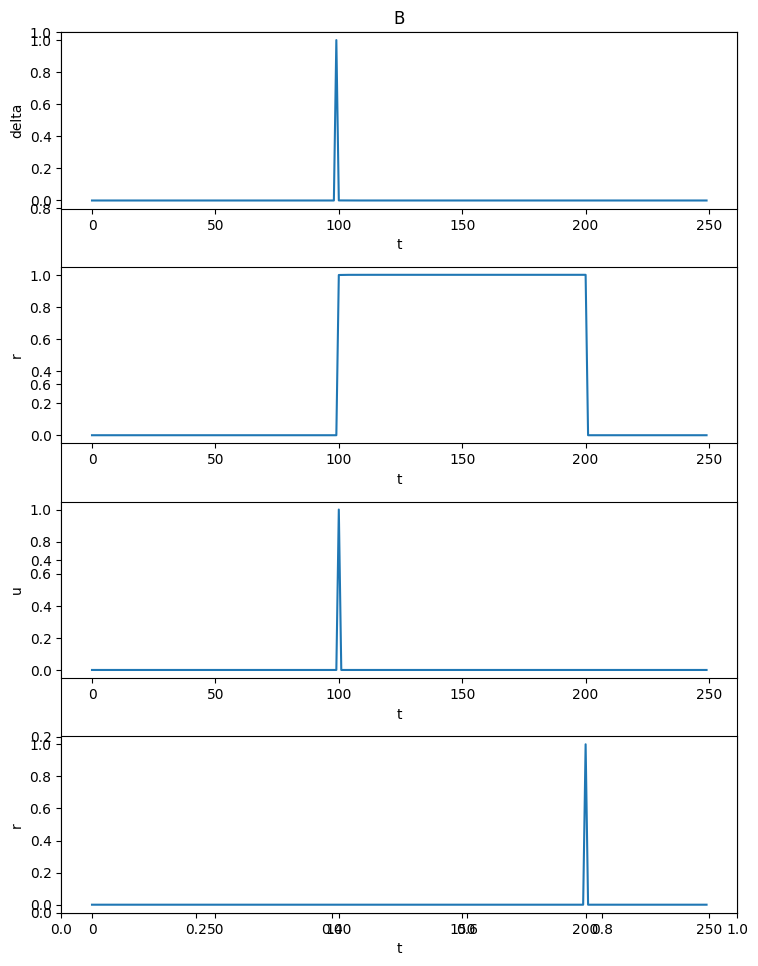

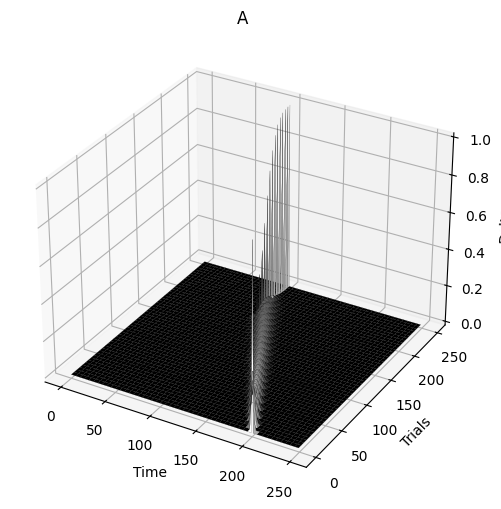

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy.stats import norm




T = 250
delta = np.zeros((T))
v = np.zeros((T))
trials = 250
w = np.zeros((T))
r = np.zeros((T))
u = np.zeros((T))

#r[220] = 1
r[200] = 1
u[100] = 1
e = 0.5
c = 1
delta_values = np.zeros((trials, T))

for n in range(0,trials):
  #delta = np.zeros((T))
  v = np.zeros((T))

  for t in range(0, T):
    for tau in range(0,t):
      v[t]= v[t]+(w[tau]*u[t-tau])
  for t in range(0, T-1):
    delta[t] = r[t] + v[t+1] - v[t]

  delta_values[n, :] = delta
  for t in range(0, T):
    for tau in range(0,t):
      w[tau]= w[tau]+e*delta[t]*u[t-tau]
  if ((n == 0) or (n == trials-1)):
    

    plt.figure(figsize=(8, 10))
    plt.title('B')
    plt.subplot(4, 1, 1)

    plt.plot(delta)
    plt.xlabel('t')
    plt.ylabel('delta')
    

    plt.subplot(4, 1, 2)
    plt.plot(v)
    plt.xlabel('t')
    plt.ylabel('r')

    plt.subplot(4, 1, 3)
    plt.plot(u)
    plt.xlabel('t')
    plt.ylabel('u')

    plt.subplot(4, 1, 4)
    plt.plot(r)
    plt.xlabel('t')
    plt.ylabel('r')

    plt.rcParams.update({'font.size': 10})
    plt.tight_layout()
    plt.show()

# Create a 3D plot
fig = plt.figure(figsize=(6, 12))
ax = fig.add_subplot(111, projection='3d')

# Create meshgrid for trials and time
time_axis, trials_axis = np.meshgrid(np.arange(T), np.arange(trials))

# Plot the 3D surface

ax.plot_surface(time_axis, trials_axis, delta_values,cmap='grey',\
                edgecolor='black',linewidth=0.1)

# Set labels for each axis
ax.set_xlabel('Time')
ax.set_ylabel('Trials')
ax.set_zlabel('Delta')
#plt.tight_layout()
plt.title('A')

plt.show()




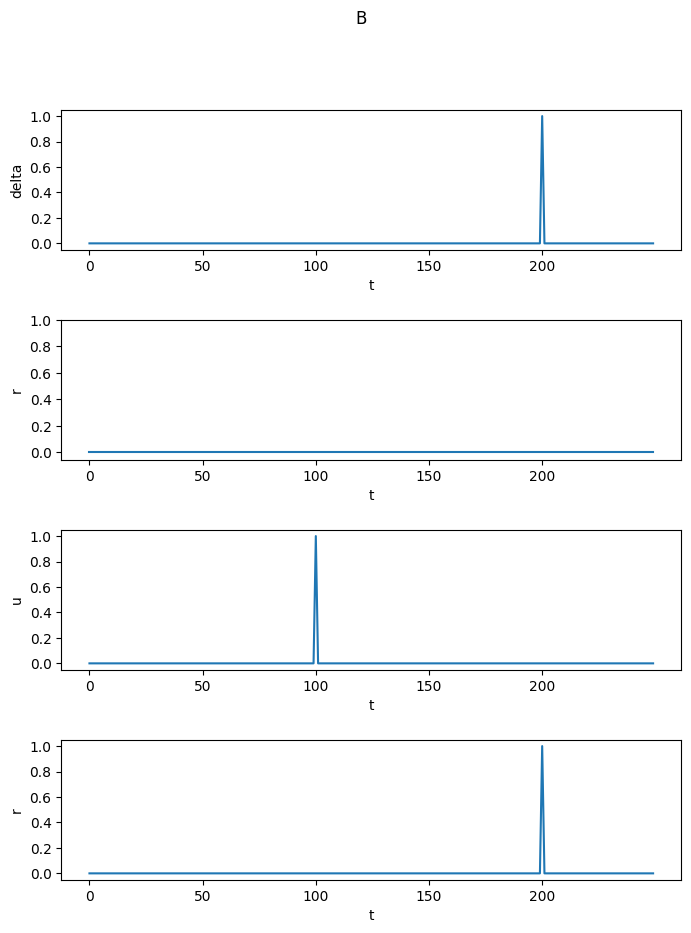

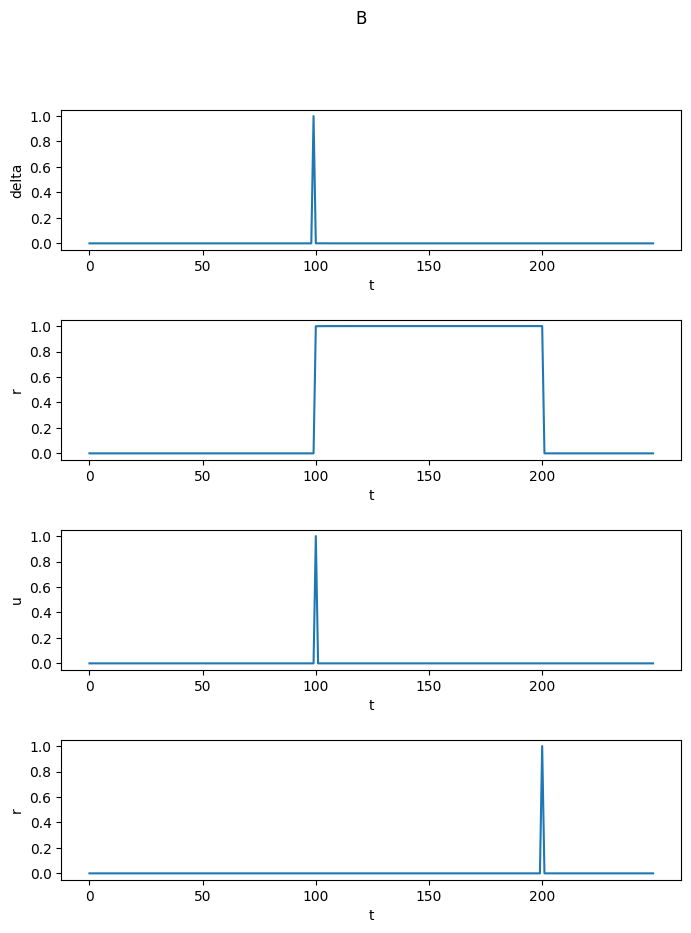

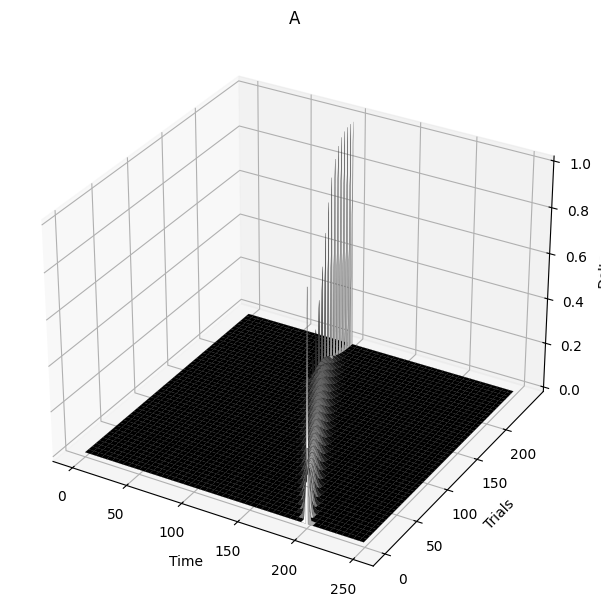

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy.stats import norm

T = 250
delta = np.zeros((T))
v = np.zeros((T))
trials = 250
w = np.zeros((T))
r = np.zeros((T))
u = np.zeros((T))

# r[220] = 1
r[200] = 1
u[100] = 1
e = 0.5
c = 1
delta_values = np.zeros((trials, T))

for n in range(0, trials):
    # delta = np.zeros((T))
    v = np.zeros((T))

    for t in range(0, T):
        for tau in range(0, t):
            v[t] = v[t] + (w[tau] * u[t - tau])
    for t in range(0, T - 1):
        delta[t] = r[t] + v[t + 1] - v[t]

    delta_values[n, :] = delta
    for t in range(0, T):
        for tau in range(0, t):
            w[tau] = w[tau] + e * delta[t] * u[t - tau]
    if ((n == 0) or (n == trials - 1)):

        fig, axes = plt.subplots(4, 1, figsize=(8, 10))
        plt.suptitle('B')

        axes[0].plot(delta)
        axes[0].set_xlabel('t')
        axes[0].set_ylabel('delta')
        axes[0].set_xticks(np.arange(0, T, step=50))
        axes[0].set_yticks(np.arange(0, 1.1, step=0.2))

        axes[1].plot(v)
        axes[1].set_xlabel('t')
        axes[1].set_ylabel('r')
        axes[1].set_xticks(np.arange(0, T, step=50))
        axes[1].set_yticks(np.arange(0, 1.1, step=0.2))

        axes[2].plot(u)
        axes[2].set_xlabel('t')
        axes[2].set_ylabel('u')
        axes[2].set_xticks(np.arange(0, T, step=50))
        axes[2].set_yticks(np.arange(0, 1.1, step=0.2))

        axes[3].plot(r)
        axes[3].set_xlabel('t')
        axes[3].set_ylabel('r')
        axes[3].set_xticks(np.arange(0, T, step=50))
        axes[3].set_yticks(np.arange(0, 1.1, step=0.2))

        plt.subplots_adjust(hspace=0.5)
        plt.show()

# Create a 3D plot
fig = plt.figure(figsize=(6, 12))
ax = fig.add_subplot(111, projection='3d')

# Create meshgrid for trials and time
time_axis, trials_axis = np.meshgrid(np.arange(T), np.arange(trials))

# Plot the 3D surface

ax.plot_surface(time_axis, trials_axis, delta_values, cmap='gray',
                edgecolor='black', linewidth=0.1)

# Set labels for each axis
ax.set_xlabel('Time')
ax.set_ylabel('Trials')
ax.set_zlabel('Delta')

# Set y-ticks explicitly
ax.set_yticks(np.arange(0, trials, step=50))

# Adjust the layout to avoid overlapping
plt.tight_layout(rect=[0, 0, 1, 1])
ax.view_init(30, -60)
ax.set_zlim(0, 1)  # Adjust the z-axis limit for better visibility

plt.title('A')
plt.show()


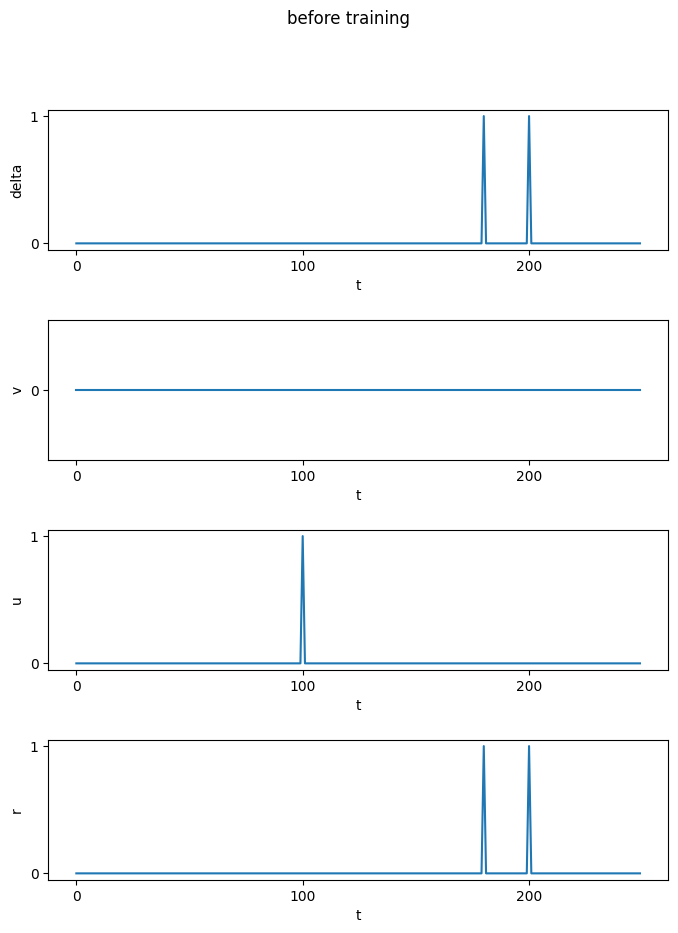

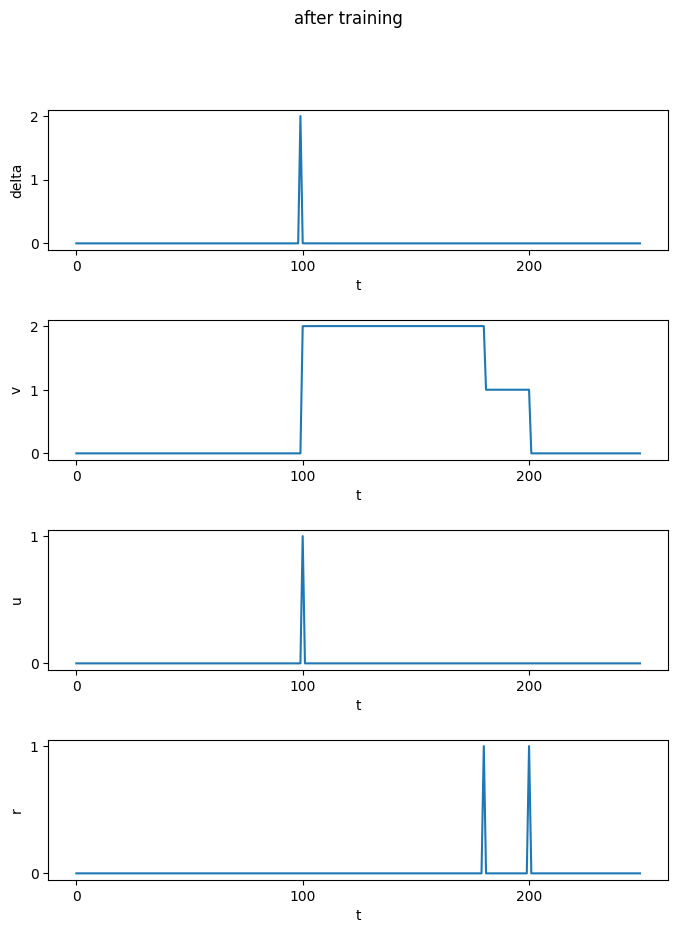

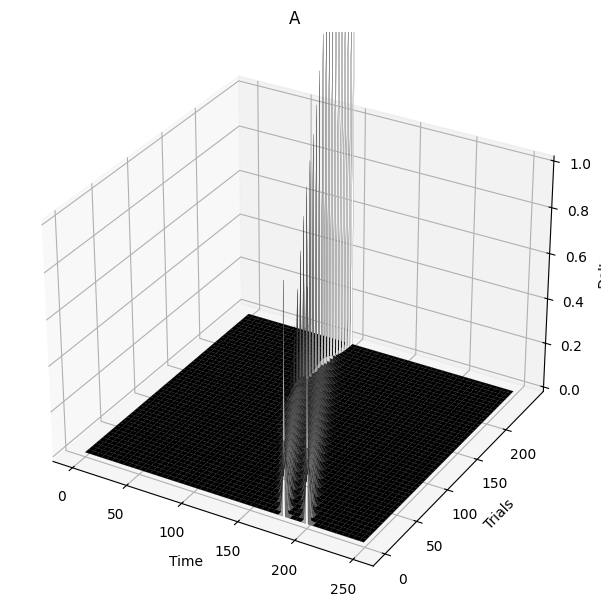

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy.stats import norm

def plot_1d_subplots(delta, v, u, r, T,n):
    if n == 0:
        tr = 'before training'
    else:
        tr = 'after training'
    fig, axes = plt.subplots(4, 1, figsize=(8, 10))
    plt.suptitle(tr)

    for i, data in enumerate([delta, v, u, r]):
        axes[i].plot(data)
        axes[i].set_xlabel('t')
        axes[i].set_ylabel(['delta', 'v', 'u', 'r'][i])
        axes[i].set_xticks(np.arange(0, T, step=100))
        axes[i].set_yticks(np.arange(0, max(data)+0.1, step=1))

    plt.subplots_adjust(hspace=0.5)
    plt.show()

def plot_3d_surface(delta_values, T, trials):
    fig = plt.figure(figsize=(6, 12))
    ax = fig.add_subplot(111, projection='3d')

    time_axis, trials_axis = np.meshgrid(np.arange(T), np.arange(trials))

    ax.plot_surface(time_axis, trials_axis, delta_values, cmap='gray',
                    edgecolor='black', linewidth=0.1)

    ax.set_xlabel('Time')
    ax.set_ylabel('Trials')
    ax.set_zlabel('Delta')

    ax.set_yticks(np.arange(0, trials, step=50))

    plt.tight_layout(rect=[0, 0, 1, 1])
    ax.view_init(30, -60)
    ax.set_zlim(0, 1)

    plt.title('A')
    plt.show()

def simulate_and_plot(trials, T):
    delta_values = np.zeros((trials, T))

    for n in range(trials):
        v = np.zeros((T))

        for t in range(T):
            for tau in range(t):
                v[t] = v[t] + (w[tau] * u[t - tau])
        for t in range(T - 1):
            delta[t] = r[t] + v[t + 1] - v[t]

        delta_values[n, :] = delta
        for t in range(T):
            for tau in range(t):
                w[tau] = w[tau] + e * delta[t] * u[t - tau]

        if n == 0 or n == trials - 1:
            plot_1d_subplots(delta, v, u, r, T,n)

    plot_3d_surface(delta_values, T, trials)

# Initialize parameters
T = 250
delta = np.zeros((T))
v = np.zeros((T))
trials = 250
w = np.zeros((T))
r = np.zeros((T))
u = np.zeros((T))

# Set initial conditions
r[200] = 1
r[180] = 1
u[100] = 1
e = 0.5

# Run simulation and plot
simulate_and_plot(trials, T)
